In [92]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [93]:
def exponential(l):
    u = random.random()
    return -math.log(u)/l

In [94]:
lambdas_a = [1,5,4,2,9,3,8,15,10]
lambdas_d = [10,15,8,3,9,2,4,5,1]
ratios = [lambdas_a[i]/lambdas_d[i] for i in range(len(lambdas_a))]
n_of_tasks=1000
avgs_queue=[]
avgs_waited=[]

In [95]:
for l in range(len(lambdas_a)):
    lambda_a=lambdas_a[l]
    lambda_d=lambdas_d[l]
    tasks=[]
    for i in range(n_of_tasks):
        tasks.append(exponential(lambda_a))

    task_id=0
    task_t=tasks[task_id]
    t=0
    queue=[]
    queue.append(t)
    serwer_t=exponential(lambda_d)  
    executed=0
    tasks_in_queue=[]
    time_waited=[]
    executed_tasks=[]
    tasks_in_queue.append([t,len(queue)])

    while(executed<n_of_tasks):
        if(task_t<=0 and task_id<n_of_tasks-1):
            queue.append(t)
            tasks_in_queue.append([t,len(queue)])
            task_id+=1
            task_t=tasks[task_id]
        if(len(queue)>0):
            if(serwer_t<=0):
                serwer_t=exponential(lambda_d)
                temp = queue.pop(0)
                #print(executed)
                executed+=1
                time_waited.append(t-temp)
                tasks_in_queue.append([t,len(queue)])
                executed_tasks.append([t,executed])
            serwer_t-=1/3600
            #print(serwer_t)
        task_t-=1/3600
        t+=1/3600
        
    avg_queue=0
    time=t
    for i in range(len(tasks_in_queue)-1,-1,-1):
        q=tasks_in_queue[i]
        temp=time-q[0]
        avg_queue+=q[1]*temp
        time-=temp
    avg_queue=avg_queue/t
    avgs_queue.append(avg_queue)
    
    avg_waited=0
    for j in range(len(time_waited)):
        avg_waited+=time_waited[j]
    avg_waited=avg_waited/len(time_waited)
    avgs_waited.append(avg_waited)

In [96]:
print(avgs_waited)
print(avgs_queue)

[0.1054433333384329, 0.10666194444384859, 0.23830472221909157, 1.3422638889461425, 1.086699444450829, 73.32839416880695, 55.497915277307825, 63.5221855555768, 445.82643668195243]
[0.10367121785212861, 0.5456869636164149, 0.9632592612560326, 2.6354426583109922, 9.173491472809616, 151.279035211047, 239.23892700159135, 324.99185388425593, 457.3784179538775]


<BarContainer object of 9 artists>

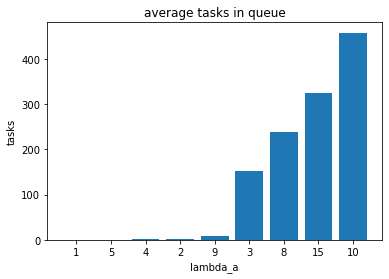

In [97]:
plt.title("average tasks in queue")
plt.xlabel("lambda_a")
plt.ylabel("tasks")
#plt.rcParams['figure.figsize'] = [10, 10]
plt.bar([str(l) for l in lambdas_a], avgs_queue)

<BarContainer object of 9 artists>

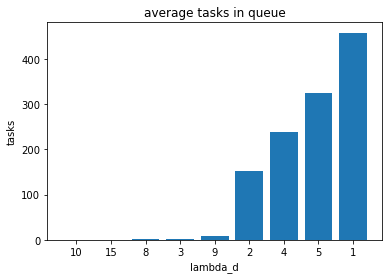

In [98]:
plt.title("average tasks in queue")
plt.xlabel("lambda_d")
plt.ylabel("tasks")
#plt.rcParams['figure.figsize'] = [10, 10]
plt.bar([str(l) for l in lambdas_d], avgs_queue)

<BarContainer object of 9 artists>

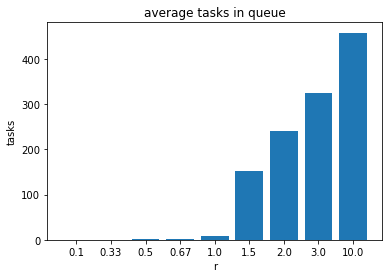

In [99]:
plt.title("average tasks in queue")
plt.xlabel("r")
plt.ylabel("tasks")
#plt.rcParams['figure.figsize'] = [10, 10]
plt.bar([str(round(l, 2)) for l in ratios], avgs_queue)

<BarContainer object of 9 artists>

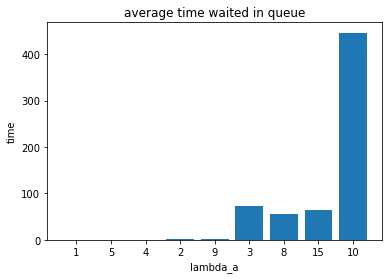

In [100]:
plt.title("average time waited in queue")
plt.xlabel("lambda_a")
plt.ylabel("time")
#plt.rcParams['figure.figsize'] = [10, 10]
plt.bar([str(l) for l in lambdas_a], avgs_waited)

<BarContainer object of 9 artists>

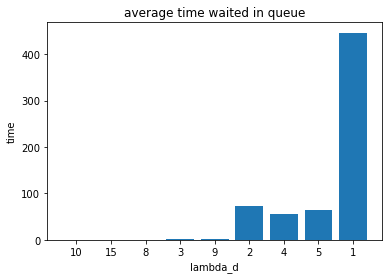

In [101]:
plt.title("average time waited in queue")
plt.xlabel("lambda_d")
plt.ylabel("time")
#plt.rcParams['figure.figsize'] = [10, 10]
plt.bar([str(l) for l in lambdas_d], avgs_waited)

<BarContainer object of 9 artists>

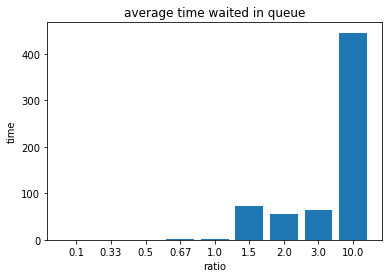

In [102]:
plt.title("average time waited in queue")
plt.xlabel("ratio")
plt.ylabel("time")
#plt.rcParams['figure.figsize'] = [10, 10]
plt.bar([str(round(l, 2)) for l in ratios], avgs_waited)